In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('Social_Network_Ads.csv')

In [6]:
data.dropna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
db = data.dropna()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

In [11]:
db = db.replace('Female', 1)
db = db.replace('Male', 0)

In [12]:
db.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [14]:
X = db.iloc[:,:-1].values

In [15]:
y = db.iloc[: , -1].values

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25)

In [19]:
lor = LogisticRegression()
lor.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = lor.predict(X_test)

In [22]:
print(y_pred)

[0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]


In [24]:
cm = confusion_matrix(y_test, y_pred)
tn , fp , fn , tp = cm.ravel()

pre_scr = precision_score(y_test, y_pred)
acc_scr = accuracy_score(y_test, y_pred)
error_score = 1-acc_scr
rec_scr = recall_score(y_test, y_pred)


In [30]:
print(f'{pre_scr:.2f}')

0.81


In [31]:
print(f'{acc_scr:.2f}')

0.83


In [32]:
print(f'{error_score:.2f}')

0.17


In [33]:
print(f'{rec_scr:.2f}')

0.57


In [34]:
import matplotlib.pyplot as plt

<Axes: >

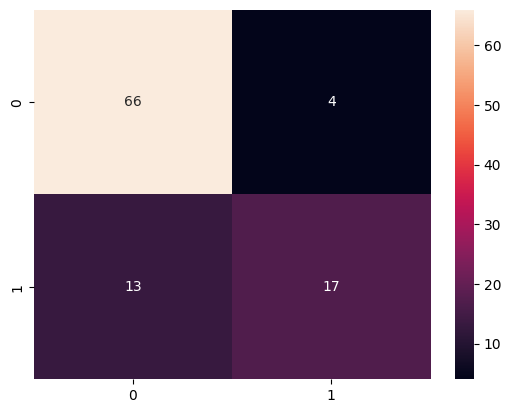

In [35]:
import seaborn as sns
sns.heatmap(cm ,annot=True)